In [1]:
import numpy as np
from PIL import Image
import imageio
import cv2
import matplotlib.pyplot as plt
import os
import torchvision

In [25]:
path = './ckp/results/E200_ 20_pred.png'
path2 = './ckp/results/E200_ 20_target.png'

In [22]:
io = imageio.imread(path)
io2 = imageio.imread(path2)

In [23]:
print(io.shape)

(600, 600, 4)


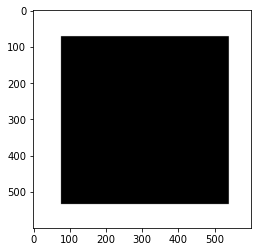

In [24]:
plt.figure()
plt.imshow(io)
plt.show()

In [ ]:
print(io[:,:,0])

In [ ]:
print(cv[:,:,0])

In [ ]:
t = cv2.cvtColor(cv, cv2.COLOR_BGR2RGB)
print(t[:,:,0])

In [ ]:
def depth_two_uint8_to_float(top_bits, bottom_bits):
    """ Converts a RGB-coded depth into float valued depth. """
    depth_map = (top_bits * 2**8 + bottom_bits).astype('float32')
    depth_map /= float(2**16 - 1)
    depth_map *= 5.0
    return depth_map

In [ ]:
t = depth_two_uint8_to_float(t[:,:,0], t[:, :, 1])

In [ ]:
print(t*100)
print(t.shape)

In [ ]:
tf = torchvision.transforms.ToTensor()
t_tensor = tf(t)
print(t_tensor*100)
print(t_tensor.shape)

In [ ]:
import torchvision.transforms.functional as tf

tf.crpo()

In [ ]:
base_dir = 'D:/datasets/STD/images/B1Random'
for idx in range(320):
    image_path = os.path.join(base_dir, 'SK_depth_%d.png' % idx)

    io = imageio.imread(image_path)

    depth = io[:,:,0]+io[:,:,1]*256
    depth[depth < 200] = 0
    depth[depth > 600] = 0

    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.imshow(depth)
    plt.show()

In [ ]:
image_path = os.path.join(base_dir, 'SK_depth_321.png')

io = imageio.imread(image_path)

depth = io[:,:,0]+io[:,:,1]*256
depth[depth < 200] = 0
depth[depth > 600] = 0

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.imshow(depth)
plt.show()

In [ ]:
from cvzone.HandTrackingModule import HandDetector
import cv2

In [ ]:
img = cv2.imread('D:/datasets/RHD_v1-1/RHD_published_v2/training/color/00000.png')
print(type(img))

In [ ]:
# cap = cv2.VideoCapture(0)
detector = HandDetector(detectionCon=0.8, maxHands=2)
while True:
    # Get image frame
    # success, img = cap.read()
    # print(type(success), type(img))
    img = cv2.imread('D:/datasets/RHD_v1-1/RHD_published_v2/training/color/00000.png')
    # Find the hand and its landmarks
    hands, img = detector.findHands(img)  # with draw
    # hands = detector.findHands(img, draw=False)  # without draw

    if hands:
        # Hand 1
        hand1 = hands[0]
        lmList1 = hand1["lmList"]  # List of 21 Landmark points
        bbox1 = hand1["bbox"]  # Bounding box info x,y,w,h
        centerPoint1 = hand1['center']  # center of the hand cx,cy
        handType1 = hand1["type"]  # Handtype Left or Right

        fingers1 = detector.fingersUp(hand1)

        if len(hands) == 2:
            # Hand 2
            hand2 = hands[1]
            lmList2 = hand2["lmList"]  # List of 21 Landmark points
            bbox2 = hand2["bbox"]  # Bounding box info x,y,w,h
            centerPoint2 = hand2['center']  # center of the hand cx,cy
            handType2 = hand2["type"]  # Hand Type "Left" or "Right"

            fingers2 = detector.fingersUp(hand2)

            # Find Distance between two Landmarks. Could be same hand or different hands
            length, info, img = detector.findDistance(lmList1[8], lmList2[8], img)  # with draw
            # length, info = detector.findDistance(lmList1[8], lmList2[8])  # with draw
    # Display
    cv2.imshow("Image", img)
    cv2.waitKey(1)
cap.release()
cv2.destroyAllWindows()

In [10]:
path = 'D:/datasets/cvpr14_MSRAHandTrackingDB/cvpr14_MSRAHandTrackingDB/Subject1/joint.txt'
with open(path, 'r') as f:
    listl = []
    for line in f:
        strip_lines = line.strip()
        listli=strip_lines.split()
        m = listl.append(np.asarray(listli))

In [14]:
import numpy as np
li = np.asarray(listl)

C:\Users\UVRLab\AppData\Local\Temp/ipykernel_23172/1478361731.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  li = np.asarray(listl)


In [23]:
li = np.loadtxt(path, dtype = float,delimiter=' ', skiprows = 1)

In [29]:
li_reshape = li[0].reshape([-1,3])

In [32]:
print(li_reshape.shape)

(21, 3)


In [51]:
jointlists = np.empty([0,21,3])

In [59]:
path = 'D:/datasets/cvpr14_MSRAHandTrackingDB/cvpr14_MSRAHandTrackingDB'
jointlists = np.empty([0,21,3])
for i in range(1, 7):
    joint_path = os.path.join(path, 'Subject%d' % i, 'joint.txt')
    jointlist = np.loadtxt(joint_path, dtype=float, delimiter=' ', skiprows=1)
    jointlist = [joint.reshape([-1,3]) for joint in jointlist] #[400,21,3]
    print(np.asarray(jointlist).shape)
    jointlists=np.append(jointlists, jointlist, axis=0)

print(jointlists.shape)

(400, 21, 3)
(400, 21, 3)
(400, 21, 3)
(400, 21, 3)
(400, 21, 3)
(400, 21, 3)
(2400, 21, 3)


In [ ]:
import sys
sys.path.append('.')
sys.path.append('..')
import torch
from utils.train_utils import orthographic_proj_withz as proj


